In [1]:
from cgmbrush import *
from tempfile import TemporaryFile
import cProfile
import io
import pstats

In [ ]:
# Perf testing for reading Bolshoi density fields

provider = BolshoiProvider()

pr = cProfile.Profile()
pr.enable()
den_field = provider.get_density_field(0, 256)
pr.disable()
s = io.StringIO()
ps = pstats.Stats(pr, stream=s).sort_stats('tottime')
ps.print_stats()

file_path = os.path.join(varFolder, 'bolshoi_density_perf.txt')
with open(file_path, 'w') as f:
    f.write(s.getvalue())

saveArray("perf_denfield", den_field)

In [ ]:
provider = BolshoiProvider()

pr = cProfile.Profile()
pr.enable()
read_denfield = loadArray("perf_denfield.npy")
pr.disable()
s = io.StringIO()
ps = pstats.Stats(pr, stream=s).sort_stats('tottime')
ps.print_stats()

file_path = os.path.join(varFolder, 'bolshoi_density_perf_read.txt')
with open(file_path, 'w') as f:
    f.write(s.getvalue())

In [ ]:
# Testing savez
outfile = TemporaryFile()
x = np.arange(1000)
y = np.arange(1000) + 1

arrays = {'y':y, 'x':x, }

np.savez(outfile, **arrays)
_ = outfile.seek(0)
npzfile = np.load(outfile)
npzfile['x']

In [ ]:
p = BolshoiProvider()
a = p.extract_halos(0)
print(a.shape)
b = loadArray('bol_halos_0')
print(b.shape)

In [ ]:
print(a.shape)
print(a.info(memory_usage='deep'))
print(b.shape)
print(type(b))
print(str((b.size * b.itemsize)/1024**2) + " MB")
print(b[0])

Performing Calculations for fire1_256_2021-08-30


/Users/ianw89/Repos/cgm-brush/src/cgmbrush.py:474: RuntimeWarning: invalid value encountered in double_scalars
  return integrate.quad(lambda x, y, z: rho_nought/(((offset+(x**2+y**2+ z**2)**.5)/R_s)*(1+((x**2+y**2+ z**2)**.5)/R_s)**2),-1*np.real((Rvir**2-(x**2+y**2))**.5),np.real((Rvir**2-(x**2+y**2))**.5),args=(x,y))[0]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/ianw89/Repos/cgm-brush/src/cgmbrush.py:468: RuntimeWarning: invalid value encountered in double_scalars
  return integrate.quad(f,-1*np.real((Rvir**2-(x**2+y**2))**.5),np.real((Rvir**2-(x**2+y**2))**.5),args=(x,y))[0]


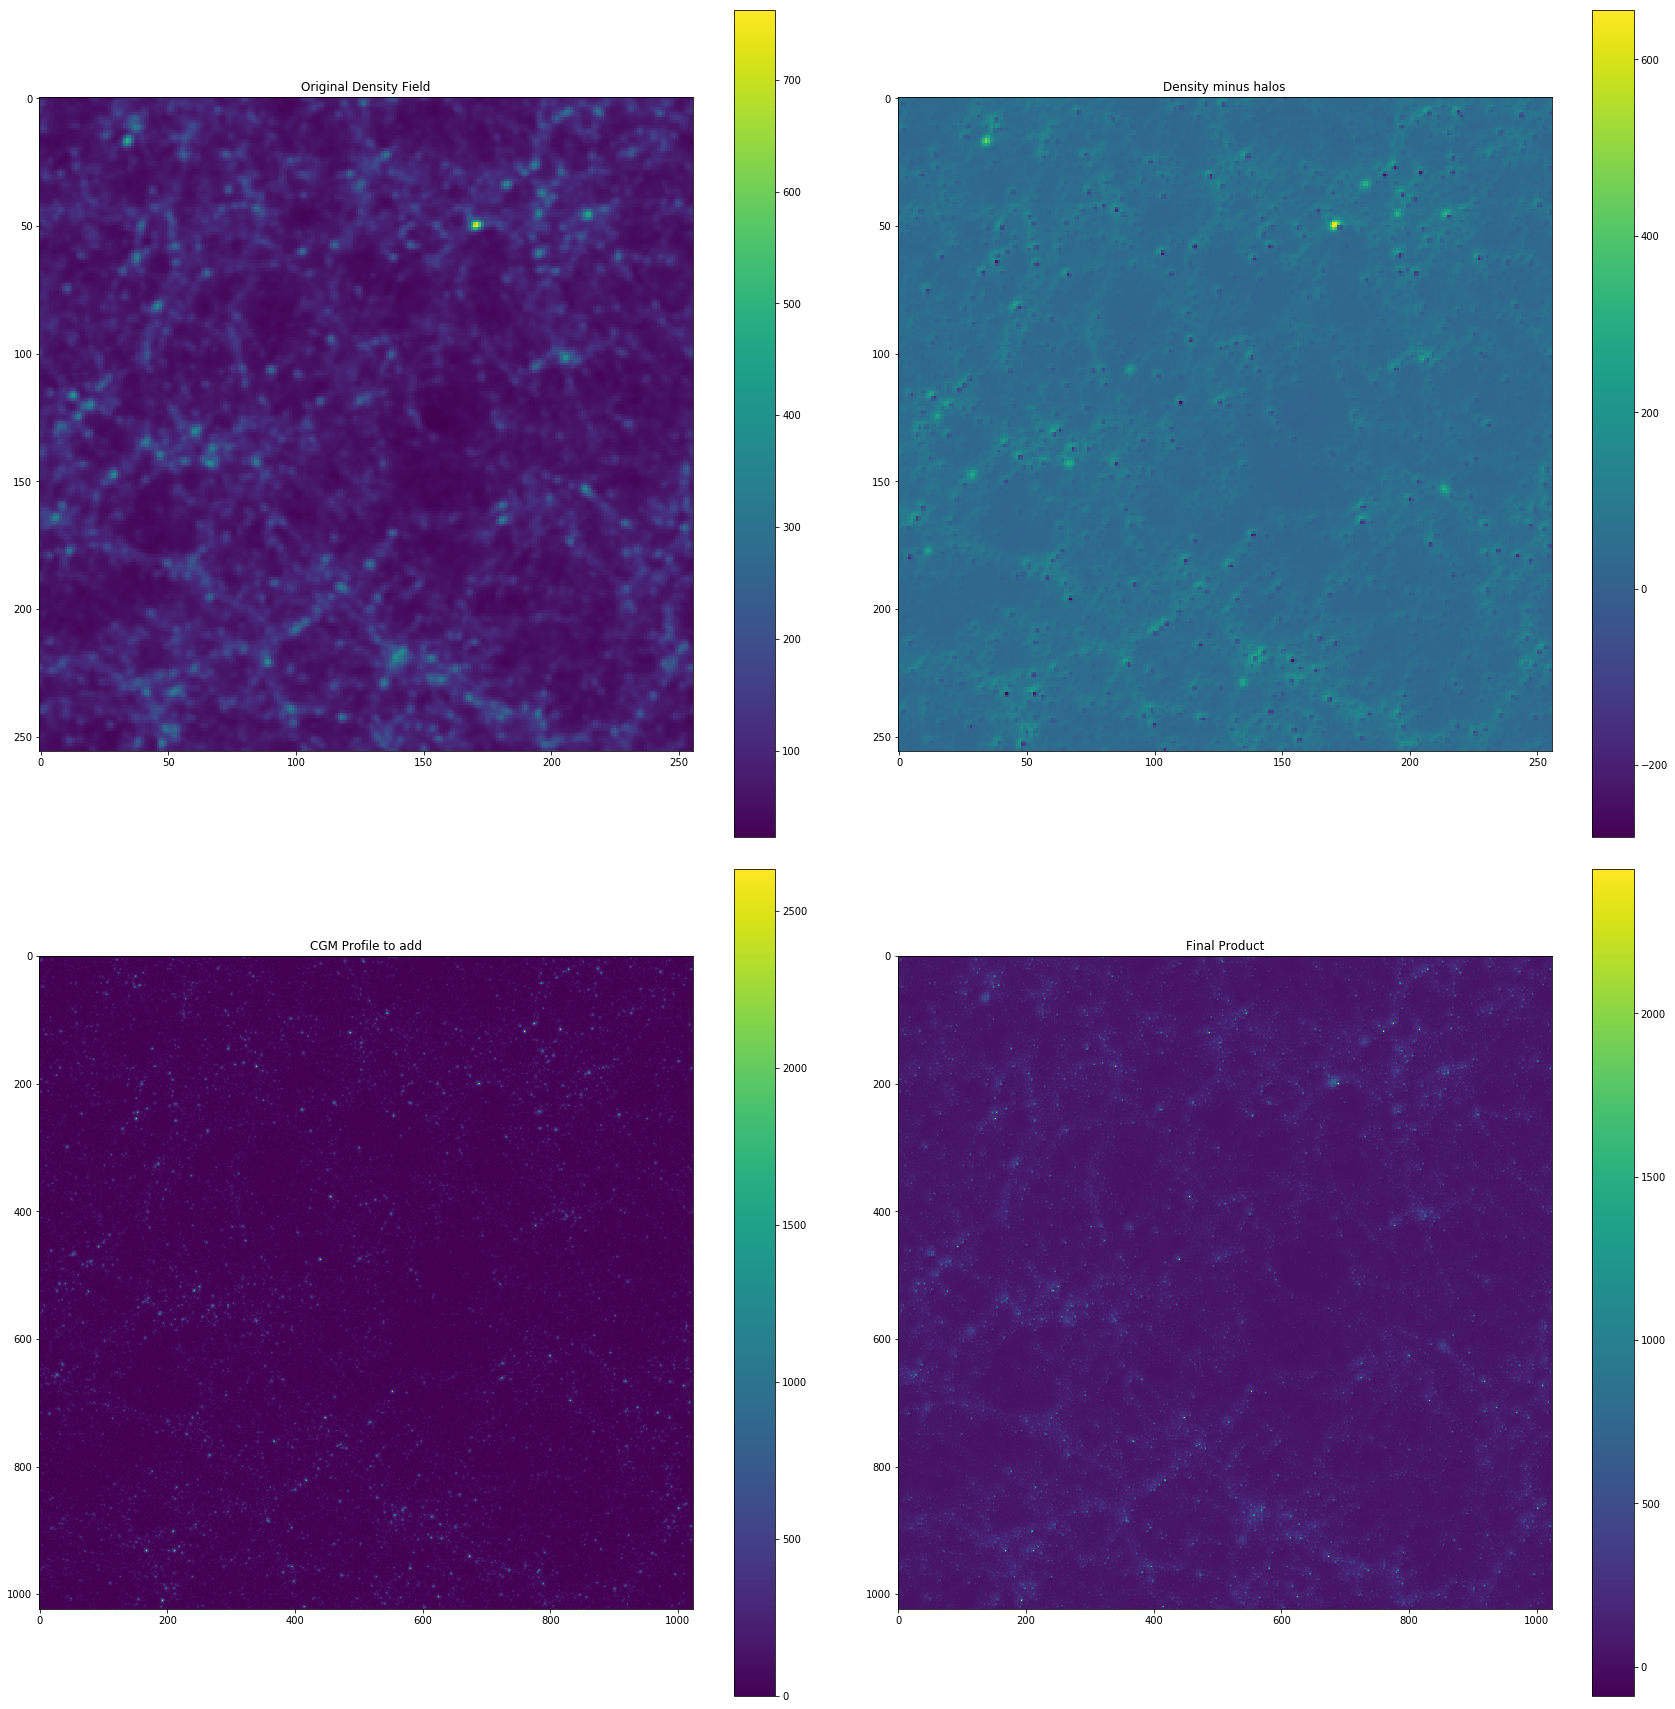

In [2]:
# Profiling full convolution code for simplest case

config = Configuration('fire', 1, resolution=1, load_from_files=False)
config.provider = BolshoiProvider()
config.run(trace=True, plots=True)
     